In [51]:
# import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# split data to training & test 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# standard datasets
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics


# COLLECT DATA

In [2]:
#import dataset
data = pd.read_csv("../processed_data/spambase.csv")
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
print(data.columns)
print(len(data.columns))
print(len(data))

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
# check if any column is null 
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

# EXPLORE DATA

In [7]:
grouped_data = data.groupby(data['class'])
print(grouped_data[data.columns[0]].describe(include='all'))

        count      mean       std  min  25%  50%   75%   max
class                                                       
0      2788.0  0.073479  0.297838  0.0  0.0  0.0  0.00  4.34
1      1813.0  0.152339  0.310645  0.0  0.0  0.0  0.17  4.54


In [15]:
# print('columns','  ','0s','     ','other')
print (f"{'columns':<30}{'0s':<10}{'other': <10}")
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (f"{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")

columns                       0s        other     
word_freq_make                3548      1053      
word_freq_address             3703      898       
word_freq_all                 2713      1888      
word_freq_3d                  4554      47        
word_freq_our                 2853      1748      
word_freq_over                3602      999       
word_freq_remove              3794      807       
word_freq_internet            3777      824       
word_freq_order               3828      773       
word_freq_mail                3299      1302      
word_freq_receive             3892      709       
word_freq_will                2276      2325      
word_freq_people              3749      852       
word_freq_report              4244      357       
word_freq_addresses           4265      336       
word_freq_free                3360      1241      
word_freq_business            3638      963       
word_freq_email               3563      1038      
word_freq_you                 1

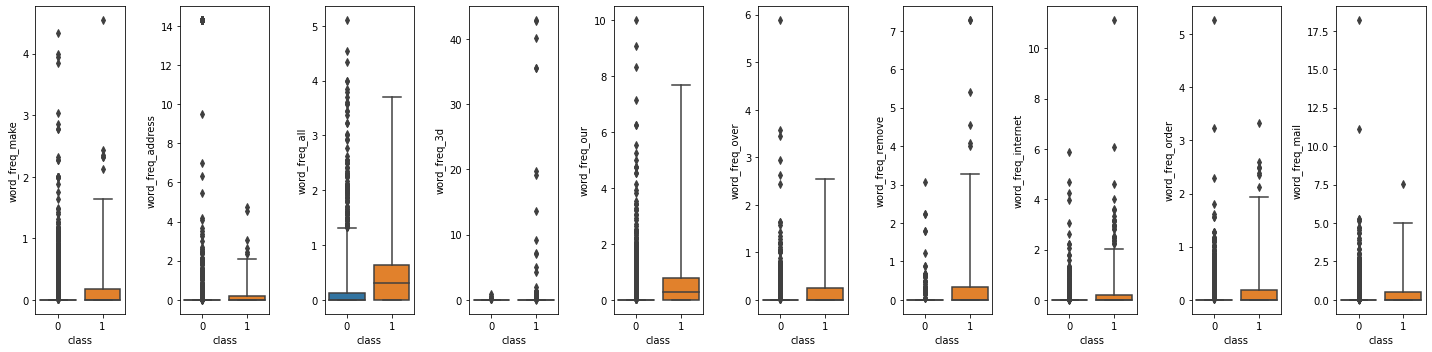

In [30]:
## TODO: plot for all columns
fig, axes = plt.subplots(1, 10, figsize = (20, 5))
for i in range(0,10):
    sns.boxplot(x='class', y = data.columns[i], data = data, orient = 'v', ax = axes[i], whis=10)
plt.tight_layout()

In [ ]:
## TODO: more EDA

# Data Modelling
## Classification


In [44]:
#Splitting dataset for classification
#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.25, random_state=0)
# print(len(x_train))
print("Test Data: ", len(x_test))
#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)
print("Test Data: ", len(x_train))
print("Test Data: ", len(x_val))

# print(x_train.head())
# print(x_test.head())

Test Data:  1151
Test Data:  2587
Test Data:  863


In [49]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_val_scaled = pd.DataFrame(scaler.transform(x_val))

### Decision Tree

In [53]:
# estimate the skill of model -> lest try with validation dataset
decisionTreeClf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisionTreeClf.fit(x_train_scaled,y_train)
# structure of the decision tree classifier
# print(classifier.tree_.__getstate__()['nodes'])
# len(classifier.tree_.__getstate__()['nodes'])
y_pred = decisionTreeClf.predict(x_val_scaled)
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

NameError: name 'metrics' is not defined